In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(precision = 5, suppress = True)

pd_data = pd.read_csv("성_및_연령별_1인가구__시군구_20230313213550.csv", encoding="cp949")
pd_data.head()

np_data = pd_data.to_numpy()
np_data = np_data[:,2:].astype(np.int64)
print(np_data)


[[  2015 164617 197132]
 [  2016 168035 204377]
 [  2017 176932 211967]
 [  2018 183579 220829]
 [  2019 191796 231431]
 [  2020 206311 248896]
 [  2021 222040 265322]]


In [88]:
# 남성/여성 평균치
mean = np.mean(np_data, axis=0)
m_mean = np_data[:,1].mean()
f_mean = np_data[:,2].mean()
print(mean)
print(m_mean)
print(f_mean)

[  2018.      187615.71429 225707.71429]
187615.7142857143
225707.7142857143


In [89]:
# 남성/여성 편차
m_deviation = np_data[:,1] - m_mean
f_deviation = np_data[:,2] - f_mean


print(m_deviation)
print(f_deviation)

[-22998.71429 -19580.71429 -10683.71429  -4036.71429   4180.28571
  18695.28571  34424.28571]
[-28575.71429 -21330.71429 -13740.71429  -4878.71429   5723.28571
  23188.28571  39614.28571]


In [90]:
print(np_data.shape)

# by broadcasting
# 편차 구하기
print(np_data - np.mean(np_data, axis=0))

(7, 3)
[[    -3.      -22998.71429 -28575.71429]
 [    -2.      -19580.71429 -21330.71429]
 [    -1.      -10683.71429 -13740.71429]
 [     0.       -4036.71429  -4878.71429]
 [     1.        4180.28571   5723.28571]
 [     2.       18695.28571  23188.28571]
 [     3.       34424.28571  39614.28571]]


In [91]:
# 남/여 1인 가구수 상관도

corr = np.corrcoef(np_data[:, 1], np_data[:, 2])

print(corr)


[[1.     0.9987]
 [0.9987 1.    ]]


In [92]:
# 남성/여성 % 구성 비율

# print(np_data)
year_sum = np.sum(np_data[:,1:], axis=1)
# print(year_sum, year_sum.shape)
# print(np_data[:, 1:], np_data[:,1:].shape)

year_sum = year_sum[:,np.newaxis]
# print(year_sum, year_sum.shape)

year_sum_concat = np.concatenate((year_sum, year_sum), axis=1)

ratio = np_data[:,1:]/year_sum_concat

# print(np_data)
# print(ratio)

total_concat = np.concatenate((np_data, ratio), axis=1)
# print(total_concat)

year = np_data[:,0]
# print(year.reshape(7,1))
year = year.reshape(7,1)
# year = year[:, np.newaxis]
t_concat = np.concatenate((year,ratio), axis=1)
print(t_concat)

[[2015.         0.45506    0.54494]
 [2016.         0.45121    0.54879]
 [2017.         0.45496    0.54504]
 [2018.         0.45395    0.54605]
 [2019.         0.45318    0.54682]
 [2020.         0.45322    0.54678]
 [2021.         0.4556     0.5444 ]]


In [93]:
print(np_data)
print("남/여 평균 :", np.mean(np_data, axis=0)[1:])

[[  2015 164617 197132]
 [  2016 168035 204377]
 [  2017 176932 211967]
 [  2018 183579 220829]
 [  2019 191796 231431]
 [  2020 206311 248896]
 [  2021 222040 265322]]
남/여 평균 : [187615.71429 225707.71429]


LeveneResult(statistic=0.1773168571799517, pvalue=0.6811330893323229)

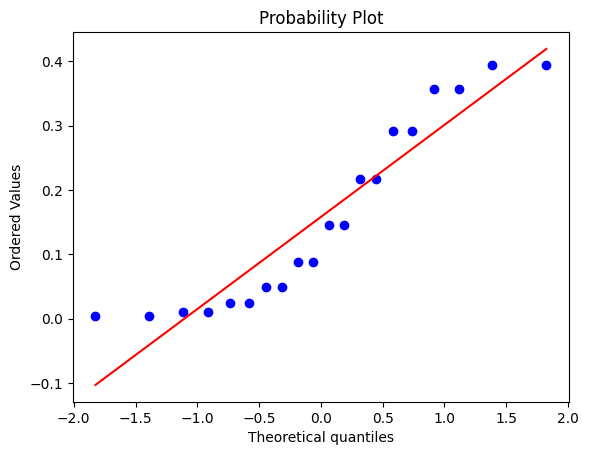

In [110]:
from scipy import stats

# t-test : 2개 그룹의 평균값 비교

# t-test 조건
# 각 샘플의 모집단은 normal distribution을 따른다
# 각 샘플의 모집단 분산은 같다

stats.ttest_ind(np_data[:,1], np_data[:,2]) # 남자, 여자

# 귀무가설 기각 -> 두개 그룹의 평균값은 다르다

# 표준 정규분포(normal distribution) 검정
# shapiro, anderson, kstest

# shapiro 활용
# shapiro 귀무가설
# 샘플의 모집단의 정규분포를 따른다
stats.shapiro(np_data[:,1]) # 귀무가설 수용 : 정규분포를 따름
stats.shapiro(np_data[:,2]) # 귀무가설 수용 : 정규분포를 따름

# anderson 활용
# anderson 귀무가설
# 샘플의 모집단은 선택된 분포를 따른다. (anderson : 여러 가지 분포 선택 가능!)
# statistic 값이 선택된 significance_level의 critical_value보다 크면 귀무가설 기각
stats.anderson(np_data[:,1])  # 0.2212가 0.5%의 critical_value 0.742보다 작으므로 귀무가설 수용
stats.anderson(np_data[:,2])

# kstest 활용
# goodness of fit (선택된 분포와 일치하는지 검정)
# 귀무가설 : 선택된 분포와 데이터가 일치
stats.kstest(np_data[:,1], stats.norm.cdf)  # p-value < 0.05 : 노멀 분포를 따르지 않음!
ys = stats.norm.pdf(np.linspace(-3,3,20)) # 수정 필요! (정규분포를 따르는 랜덤값 필요)
stats.kstest(ys, stats.norm.cdf)

## qqplot
_, axe = plt.subplots()
# stats.probplot(np_data[:, 1], plot= axe)
stats.probplot(ys, plot=axe)

# 분산 검정 (equal variance)
# bartlett, levene

# bartlett
# 귀무가설 : 2개 그룹의 varience(분산)은 같다.
stats.bartlett(np_data[:,1], np_data[:,2])  # p-value > 0.05 : 귀무가설 수용. 즉, 분산이 같음!

# levene
# 귀무가설 : 2개 그룹의 varience(분산)은 같다.
# 샘플이 normal distribution이 아닌 경우 사용
stats.levene(np_data[:,1], np_data[:,2])  # p-value > 0.05 : 귀무가설 수용. 즉, 분산이 같음!

